In [1]:
###この章では、吸収端の大きなピークを取り扱う(小さいピークはDetail_Detect_SmallPeak.ipynb)###
###小さなピークの検出方法とは異なるので注意が必要です###

from larch import Interpreter
session = Interpreter()
import larch
from larch import io
from larch import xafs
from larch.io import read_ascii
from larch.xafs import pre_edge
from larch.xafs import mback

import matplotlib.pyplot as plt
import numpy as np

data = io.read_ascii("output.txt", labels="energy mu")
larch.xafs.pre_edge(data, _larch=session)

In [2]:
print('e0(吸収端)は', data.e0)
print('edge_stepは', data.edge_step)
print('edgeの種類は', data.edge)

#e0→(μtの一次微分の最初のピーク)
#つまり、e0は「変曲点の1つ手前のデータ(今回は、変曲点として扱います)」

#edge_step→Δμ(吸収端のジャンプの値であるが、今回は用いません)

#edge→○○吸収端 (今回は、L1吸収端であることを示している)

e0(吸収端)は 13886.318471
edge_stepは 0.9999999999999928
edgeの種類は L1


[matplotlib.legend] WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


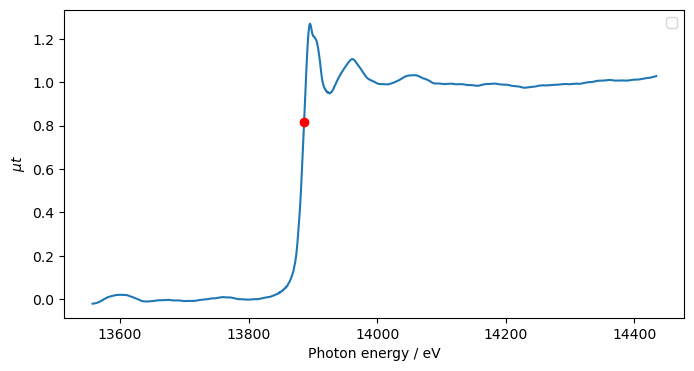

In [3]:
###赤い点は、e0=ピークの変曲点=吸収端を示している###

fig = plt.figure(figsize=(8, 4))
plt.plot(data.energy, data.mu)
plt.plot(data.e0, data.mu[data.energy == data.e0], 'o', color='r')
plt.xlabel("Photon energy / eV"); plt.ylabel("$\mu t$"); plt.legend()
plt.show()

In [4]:
#変曲点のデータの値

print(data.e0)
print(data.mu[data.energy == data.e0])

13886.318471
[0.81779676]


In [5]:
import numpy as np

# データ点の座標を表すndarray
x = data.energy
y = data.mu

# 変曲点の座標を表すndarray
e0 = np.array([data.e0, np.interp(data.e0, x, y)])

# e0から最も近い極大値・極小値の座標を求める
distances = np.sqrt((x - e0[0]) ** 2 + (y - e0[1]) ** 2)
maxima = (y[1:-1] > y[:-2]) & (y[1:-1] > y[2:])
minima = (y[1:-1] < y[:-2]) & (y[1:-1] < y[2:])
extrema = np.where(maxima | minima)[0] + 1
nearest_extrema = extrema[np.argsort(distances[extrema])[:2]]
nearest_extrema_coords = np.array([[x[i], y[i]] for i in nearest_extrema])

#この時点では、nearest_extrema_coordsのうち、どちらが極小値・極大値かはわからない
#nearest_extrema_coordsは変曲点からの距離の近さによって変動する

if nearest_extrema_coords[0, 0] > nearest_extrema_coords[1, 0]:
    nearest_extrema_coords1 = np.array([[nearest_extrema_coords[0], nearest_extrema_coords[0]]])
    nearest_extrema_coords2 = np.array([[nearest_extrema_coords[1], nearest_extrema_coords[1]]])                                    
    for coord in nearest_extrema_coords1:
        print(f"最も近い極大値の座標は({coord[0, 0]}, {coord[0, 1]})です。")
    for coord in nearest_extrema_coords2:
        print(f"最も近い極小値の座標は({coord[1, 0]}, {coord[1, 1]})です。")
else:
    nearest_extrema_coords1 = np.array([[nearest_extrema_coords[0], nearest_extrema_coords[0]]])
    nearest_extrema_coords2 = np.array([[nearest_extrema_coords[1], nearest_extrema_coords[1]]])                                    
    for coord in nearest_extrema_coords1:
        print(f"最も近い極小値の座標は({coord[0, 0]}, {coord[0, 1]})です。")
    for coord in nearest_extrema_coords2:
        print(f"最も近い極大値の座標は({coord[1, 0]}, {coord[1, 1]})です。")


最も近い極大値の座標は(13895.625787, 1.2698594576435789)です。
最も近い極小値の座標は(13860.60353, 0.06283532974707712)です。


[matplotlib.legend] WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


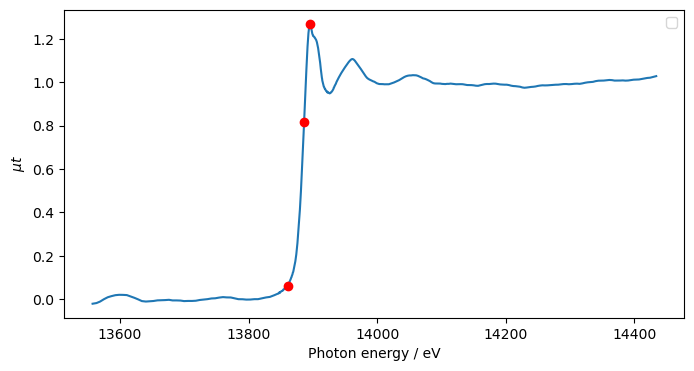

In [6]:
###ピークの極小値・変曲点・極大値を示した図###

fig = plt.figure(figsize=(8, 4))
plt.plot(data.energy, data.mu)
plt.plot(data.e0, data.mu[data.energy == data.e0], 'o', color='r')
plt.plot(nearest_extrema_coords[0, 0], nearest_extrema_coords[0, 1], 'o', color='r')
plt.plot(nearest_extrema_coords[1, 0], nearest_extrema_coords[1, 1], 'o', color='r')
plt.xlabel("Photon energy / eV"); plt.ylabel("$\mu t$"); plt.legend()
plt.show()

In [7]:
peak_width = nearest_extrema_coords[0, 0] - nearest_extrema_coords[1, 0]
peak_height = nearest_extrema_coords[0, 1] - nearest_extrema_coords[1, 1]
peak_slope = peak_height / peak_width

if peak_width < 0:
    peak_width = abs(peak_width)
    
if peak_height < 0:
    peak_height = abs(peak_height)
    
if peak_slope < 0:
    peak_slope = abs(peak_slope)
    
print(peak_width)  #peakの幅
print(peak_height) #peakの高さ
print(peak_slope)  #peakの傾き

35.022257000000536
1.2070241278965017
0.03446448719442848


# 完成版

In [17]:
import numpy as np

# データ点の座標を表すndarray
x = data.energy
y = data.mu

# 変曲点の座標を表すndarray
e0 = np.array([data.e0, np.interp(data.e0, x, y)])

# e0から最も近い極大値・極小値の座標を求める
distances = np.sqrt((x - e0[0]) ** 2 + (y - e0[1]) ** 2)
maxima = (y[1:-1] > y[:-2]) & (y[1:-1] > y[2:])
minima = (y[1:-1] < y[:-2]) & (y[1:-1] < y[2:])
extrema = np.where(maxima | minima)[0] + 1
nearest_extrema = extrema[np.argsort(distances[extrema])[:2]]
nearest_extrema_coords = np.array([[x[i], y[i]] for i in nearest_extrema])

#この時点では、nearest_extrema_coordsのうち、どちらが極小値・極大値かはわからない
#nearest_extrema_coordsは変曲点からの距離の近さによって変動する

#まずは空リストを作る。
max_peak_energy=[]
min_peak_energy=[]
max_peak_mu=[]
min_peak_mu=[]
peak_width=[]
peak_height=[]
peak_slope=[]

if nearest_extrema_coords[0, 0] > nearest_extrema_coords[1, 0]:
    nearest_extrema_coords1 = np.array([[nearest_extrema_coords[0], nearest_extrema_coords[0]]])
    nearest_extrema_coords2 = np.array([[nearest_extrema_coords[1], nearest_extrema_coords[1]]])                                    
    for coord in nearest_extrema_coords1:
        max_peak_energy.append(coord[0, 0])
        max_peak_mu.append([coord[0, 1]])
    for coord in nearest_extrema_coords2:
        min_peak_energy.append(coord[1, 0])
        min_peak_mu.append([coord[1, 1]])
        
else:
    nearest_extrema_coords1 = np.array([[nearest_extrema_coords[0], nearest_extrema_coords[0]]])
    nearest_extrema_coords2 = np.array([[nearest_extrema_coords[1], nearest_extrema_coords[1]]])                                    
    for coord in nearest_extrema_coords1:
        min_peak_energy.append(coord[0, 0])
        min_peak_mu.append([coord[0, 1]])
    for coord in nearest_extrema_coords2:
        max_peak_energy.append(coord[1, 0])
        max_peak_mu.append([coord[1, 1]])

#ピークの幅・高さ・傾きを求める
#なお、それぞれ負の値になった場合は、絶対値で正の値に戻すようにする
peak_width1 = nearest_extrema_coords[0, 0] - nearest_extrema_coords[1, 0]
peak_height1 = nearest_extrema_coords[0, 1] - nearest_extrema_coords[1, 1]
peak_slope1 = peak_height1 / peak_width1

if peak_width1 < 0:
    peak_width1 = abs(peak_width1)
    
if peak_height1 < 0:
    peak_height1 = abs(peak_height1)
    
if peak_slope1 < 0:
    peak_slope1 = abs(peak_slope1)

peak_width.append(peak_width1)
peak_height.append(peak_height1)
peak_slope.append(peak_slope1)